Download the Iris flower dataset or any other dataset into a DataFrame. (e.g.,
https://archive.ics.uci.edu/ml/datasets/Iris ). Scan the dataset and give the inference as:

List down the features and their types (e.g., numeric, nominal) available in the dataset.
Create a histogram for each feature in the dataset to illustrate the feature distributions.
Create a boxplot for each feature in the dataset.
Compare distributions and identify outliers.

. Data Visualization III
Download the Iris flower dataset or any other dataset into a DataFrame. (e.g.,
https://archive.ics.uci.edu/ml/datasets/Iris ). Scan the dataset and give the inference as:
1. List down the features and their types (e.g., numeric, nominal) available in the dataset.
2. Create a histogram for each feature in the dataset to illustrate the feature distributions.
3. Create a boxplot for each feature in the dataset.
4. Compare distributions and identify outliers.

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('/content/drive/MyDrive/TE/Temp/Dsdba/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [15]:
group_info = df.groupby('species').describe()
print(group_info)

                sepal_length                                              \
                       count   mean       std  min    25%  50%  75%  max   
species                                                                    
Iris-setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
Iris-versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
Iris-virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

                sepal_width         ... petal_length      petal_width         \
                      count   mean  ...          75%  max       count   mean   
species                             ...                                        
Iris-setosa            50.0  3.418  ...        1.575  1.9        50.0  0.244   
Iris-versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
Iris-virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                                    
         

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

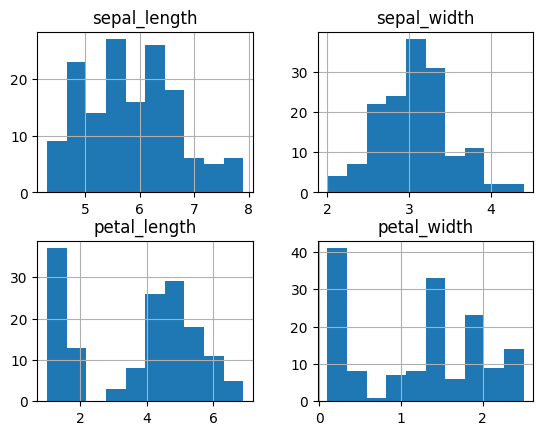

In [16]:

df.hist()

(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <BarContainer object of 10 artists>)

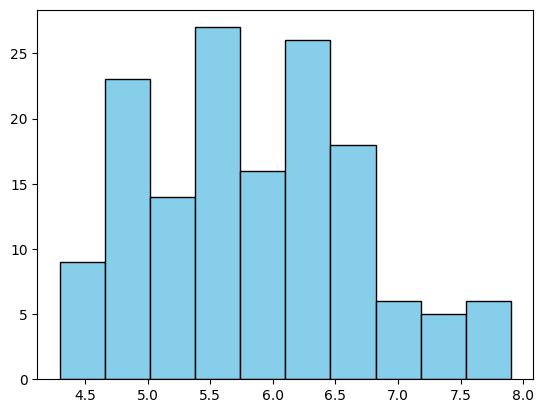

In [23]:
sepal_length = df['sepal_length'].dropna()

plt.hist( sepal_length , bins=10, color='skyblue', edgecolor='black')

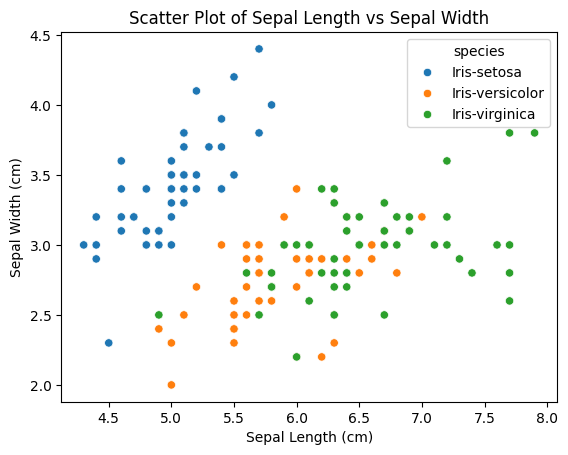

In [24]:
sns.scatterplot(x='sepal_length', y='sepal_width', data=df, hue='species')
plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

sepal length and sepal width linearly increase with increase in sepal width irrescpect of species for iris-setosa and for other species it is no co-related

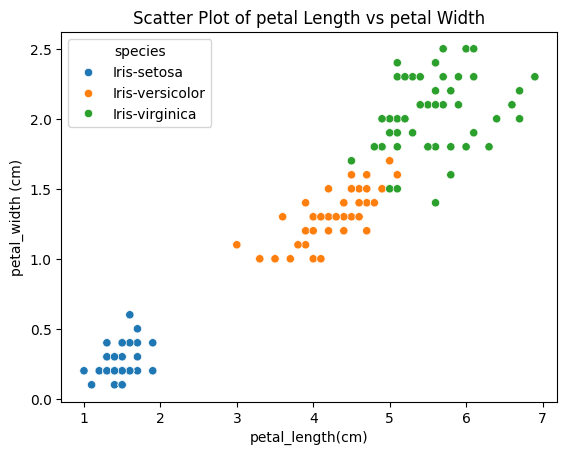

In [19]:
sns.scatterplot(x='petal_length', y='petal_width', data=df, hue='species')
plt.title('Scatter Plot of petal Length vs petal Width')
plt.xlabel('petal_length(cm)')
plt.ylabel('petal_width (cm)')
plt.show()

petal_length and petal_width linearly increase with increase in sepal width irrescpect of species

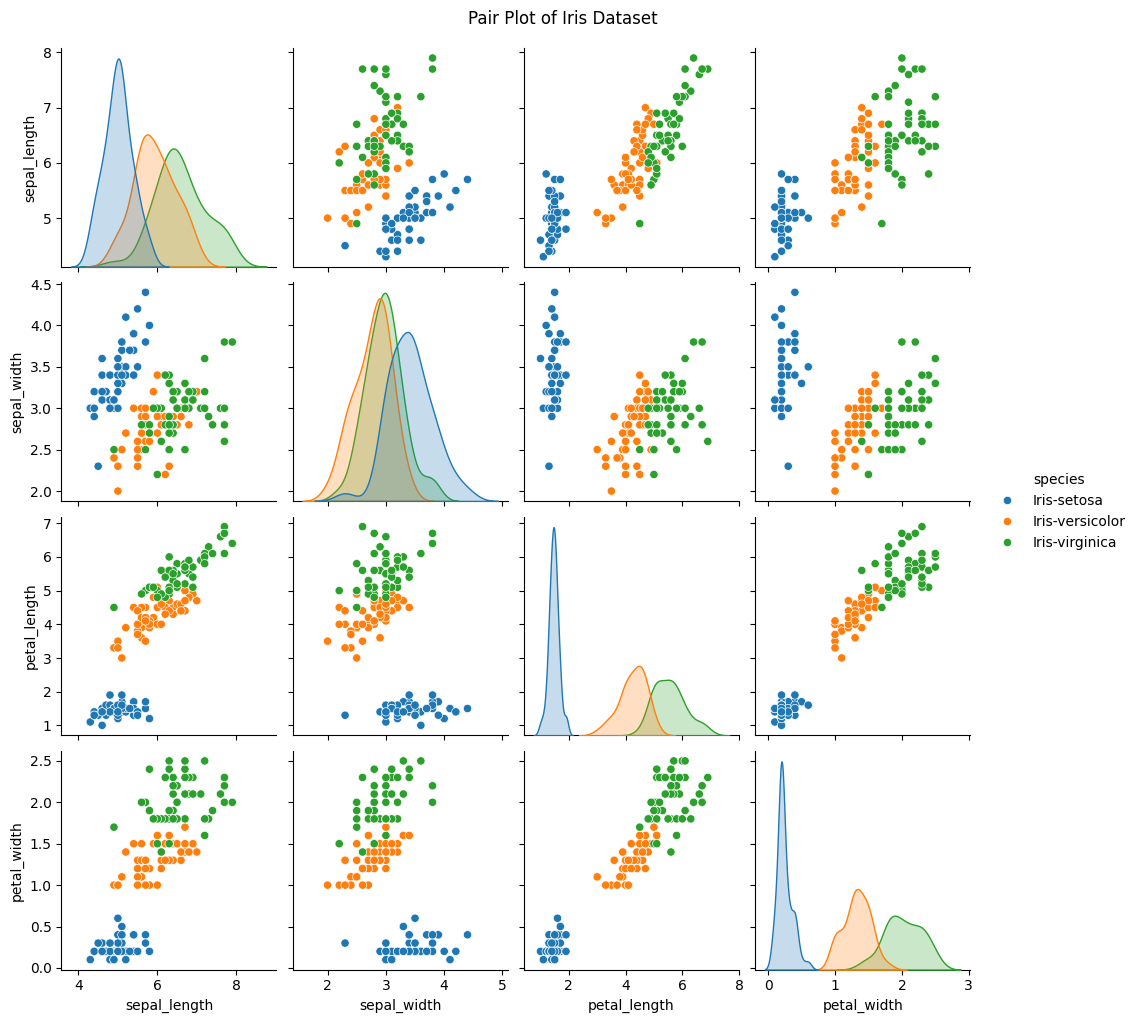

In [20]:
sns.pairplot(df, hue='species')
plt.suptitle('Pair Plot of Iris Dataset', y=1.02)
plt.show()

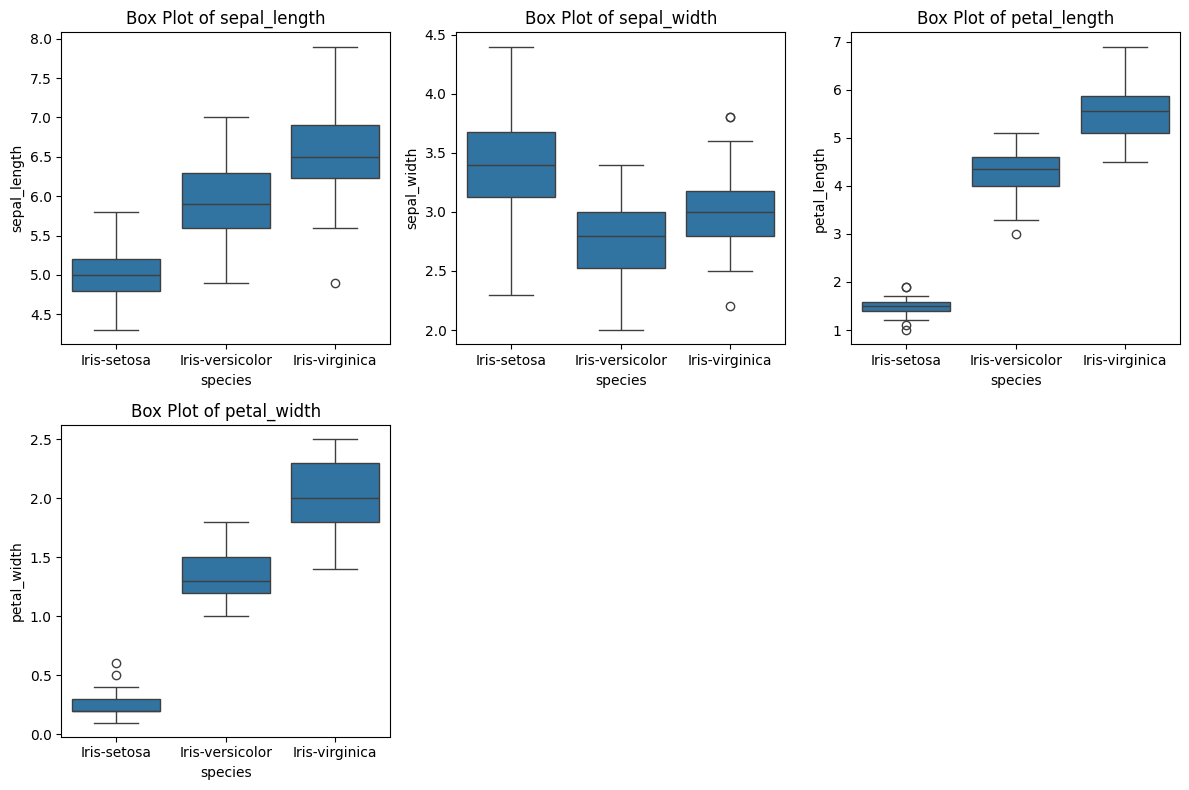

In [30]:
plt.figure(figsize=(12, 8))

for i, feature in enumerate(df.columns[:-1]):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='species', y=feature, data=df)
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

In [31]:
q1 = df['sepal_width'].quantile(0.25);
q3 = df['sepal_width'].quantile(0.75);

lb_sepalw = q1 - 1.5*(q3-q1);
ub_sepalw = q1 + 1.5*(q3-q1);
print("Lower bound and upper bound of sepal width are : ");
print(lb_sepalw,ub_sepalw);

def identify_outliers(feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return outliers

for feature in df.columns[:-1]:
    outliers = identify_outliers(feature)
    print(f'Potential Outliers in {feature}:\n{outliers}\n')

Lower bound and upper bound of sepal width are : 
2.05 3.55
Potential Outliers in sepal_length:
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []

Potential Outliers in sepal_width:
    sepal_length  sepal_width  petal_length  petal_width          species
15           5.7          4.4           1.5          0.4      Iris-setosa
32           5.2          4.1           1.5          0.1      Iris-setosa
33           5.5          4.2           1.4          0.2      Iris-setosa
60           5.0          2.0           3.5          1.0  Iris-versicolor

Potential Outliers in petal_length:
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []

Potential Outliers in petal_width:
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []



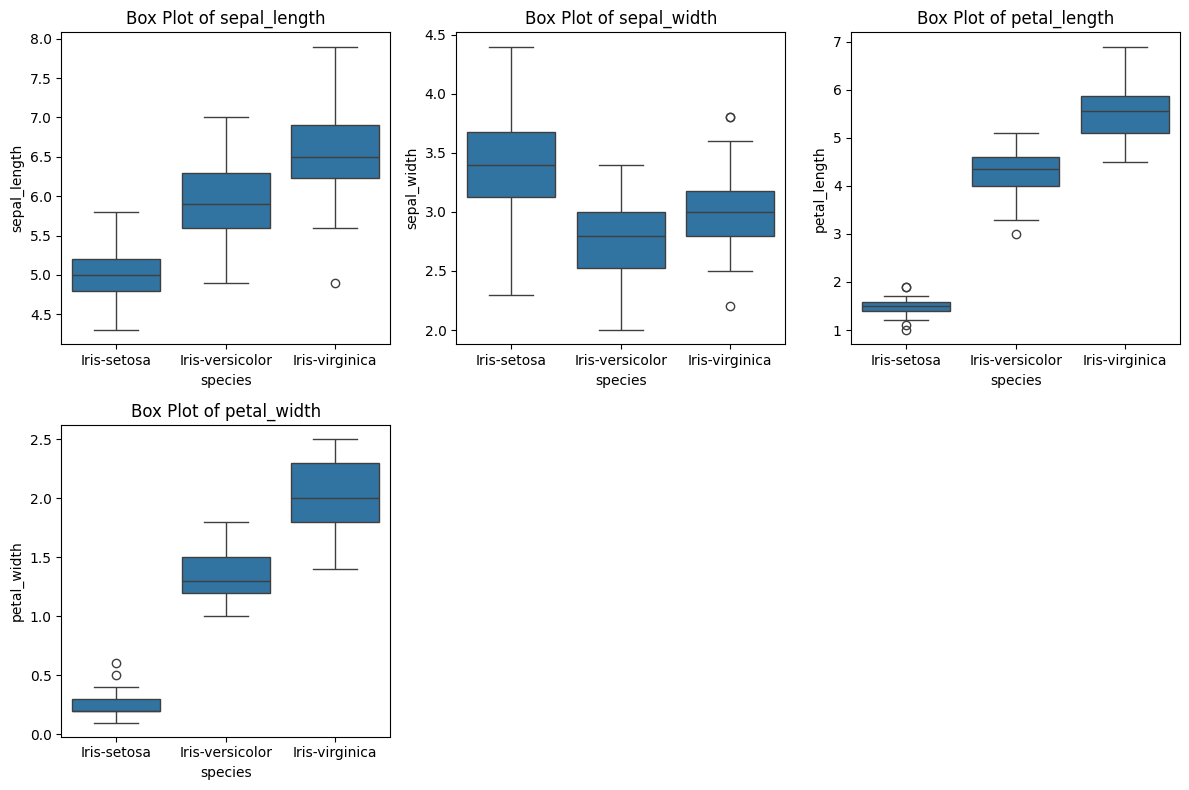

In [32]:
plt.figure(figsize=(12, 8))

for i, feature in enumerate(df.columns[:-1]):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='species', y=feature, data=df)
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()